### EDA Credit Scoring
* updated: 16/03/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import show_dist, plot_hist_numerical, count_unique_values, show_group_stats_viz

sns.set()

%matplotlib inline

In [2]:
FILE = 'cs-training.csv'

orig_data = pd.read_csv(FILE)

orig_data.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
# all cols are numeric. Some are obviously categorical

In [3]:
print(f"The shape of the original dataset is: {orig_data.shape}")

The shape of the original dataset is: (150000, 12)


In [4]:
print(f"Distinct values in column SeriousDlqin2yrs:  {orig_data['SeriousDlqin2yrs'].unique()}")

Distinct values in column SeriousDlqin2yrs:  [1 0]


This is the TARGET column. The value 1 means that the person has noot been able in the previous two years to fulfill his obligations and therefore is high risk.

### Check fields with null values (or nan)

In [52]:
orig_data.isnull().sum()

id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

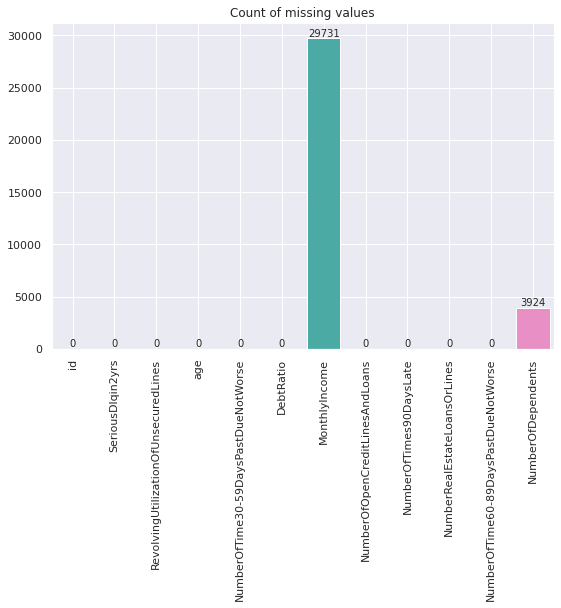

In [51]:
# let's do a plot

# using Seaborn
plt.figure(figsize=(9, 6))
plt.title("Count of missing values")
ax = sns.barplot(x=orig_data.columns, y=orig_data.isnull().sum().values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.grid(True)

We have two features (**MonthlyIncome** and **NumberOfDependents**) with a significant number of null values

we will need to inpute these values.

### Let's see some statistics

In [8]:
orig_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


From the stats we see that there are some anomalies:

* age has a minimum value of 0 (??) and a maximum of 109
* DebtRatio has a maximum really really high

In [11]:
#
# Age
#

# how many with age = 0?

condition = (orig_data['age'] < 18)

anom_data = orig_data.loc[condition]

print('Samples with age less than 18:')
anom_data.head()

Samples with age less than 18:


,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [43]:
# how many with age > 100?

condition = (orig_data['age'] > 100)

anom_data = orig_data.loc[condition]

print(f'Samples with age greater than 100: {anom_data.shape[0]}')
anom_data.head(20)

Samples with age greater than 100: 13


,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
19884,19885,0,1.000000,103,0,0.000000,1600.0,3,0,0,0,0.0
25561,25562,0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0
40007,40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0.0
56761,56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57967,57968,0,0.001397,103,0,1798.500000,1.0,11,0,2,0,0.0
90937,90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0.0
93813,93814,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0
96450,96451,0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0
105790,105791,0,0.109307,109,0,2141.000000,NaN,17,0,1,0,NaN


#### Anomalous ages

We can see that there is only one sample with age less than 18 (age = 0) and it is negative.

We have 13 samples with age > 100. Only one is positive. For many Monthly Income is not present.

The dataset is unbalanced but in these subset only one is positive. Therefore, we caln think to delete all the samples with age < 18 and age > 100

Obviously, in this way the model could have a bias for people aged greater than 100. But it is a very rare case and we can accept it. 

In [44]:
### Check DebtRatio

condition = ((orig_data['DebtRatio'] > 1000) & (orig_data['MonthlyIncome'].isna()) & (orig_data['SeriousDlqin2yrs'] == 1))

anom_data = orig_data.loc[condition]

print(f'Samples with DebtRatio greater than 1000: {anom_data.shape[0]}')
anom_data.head(20)

Samples with DebtRatio greater than 1000: 783


,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
179,180,1,0.946964,35,0,1593.0,NaN,6,0,1,0,1.0
214,215,1,0.655316,63,0,5223.0,NaN,19,0,2,0,0.0
354,355,1,0.953344,48,2,2073.0,NaN,5,1,2,2,0.0
789,790,1,1.008507,58,3,3265.0,NaN,20,0,0,1,0.0
847,848,1,0.000000,44,0,6046.0,NaN,9,0,3,0,0.0
991,992,1,0.228743,38,2,3558.0,NaN,19,0,3,0,2.0
1167,1168,1,0.902797,45,3,2788.0,NaN,8,2,1,2,0.0
1662,1663,1,1.000000,50,1,1305.0,NaN,2,0,1,0,0.0
1730,1731,1,0.537417,38,1,2748.0,NaN,5,3,1,3,0.0
1861,1862,1,0.955200,44,0,2277.0,NaN,10,0,1,0,0.0


### Check distinct values to validate categorical columns

In [15]:
cat_columns = ['age','NumberOfTime30-59DaysPastDueNotWorse',
               'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
               'NumberOfDependents']

count_unique_values(orig_data, cat_columns)

,column,cardinality
age,age,86
NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,16
NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans,58
NumberOfTimes90DaysLate,NumberOfTimes90DaysLate,19
NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines,28
NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,13
NumberOfDependents,NumberOfDependents,13


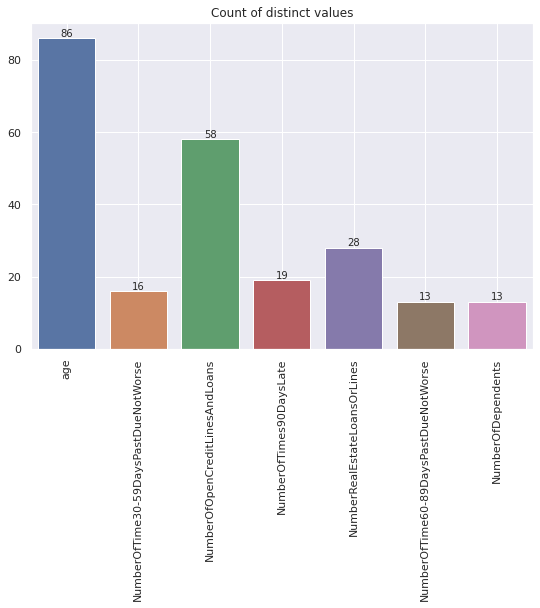

In [57]:
# let's do a plot

list_count = [orig_data[col].nunique() for col in cat_columns]

# using Seaborn
plt.figure(figsize=(9, 6))
plt.title("Count of distinct values")
ax = sns.barplot(x=cat_columns, y=list_count)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.grid(True)

In [16]:
# Ok, it is safe to assume all these columns are categorical. In addition, consider that are all ordinal. 
# for almost all of them we don't need any special preprocessing. Especially if we're using XGBoost. 

### Plot histograms

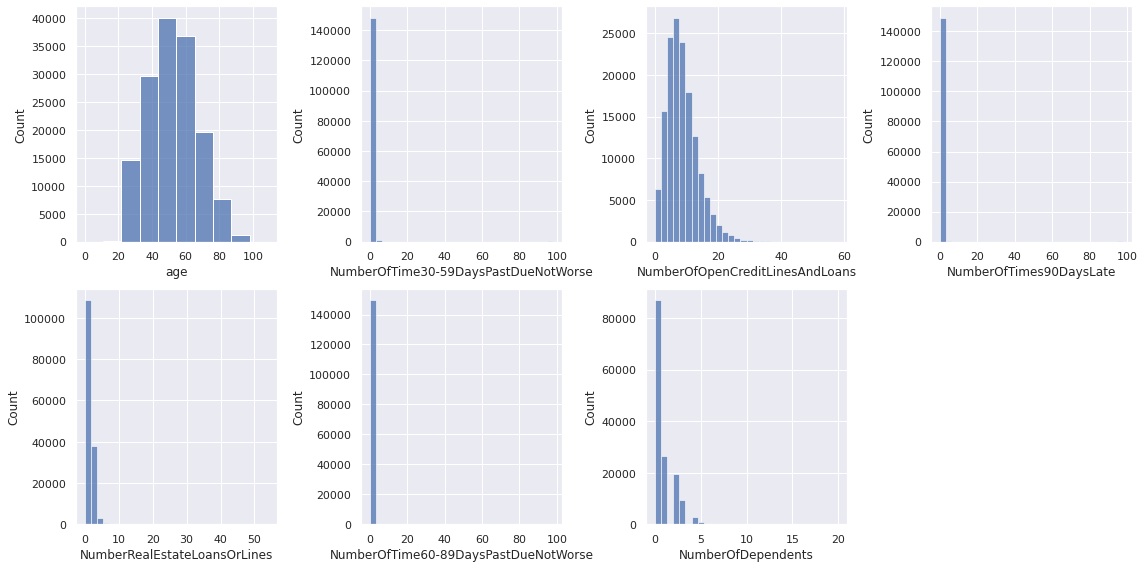

In [18]:
# number of bins for corresponding hist.
vet_bins = [10, 30, 30, 30, 30, 30, 30]

plot_hist_numerical(orig_data, cat_columns, vet_bins)

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


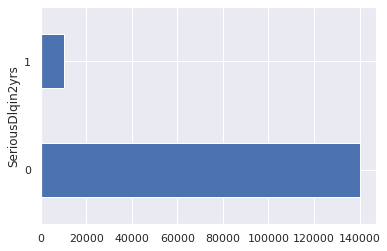

In [19]:
show_group_stats_viz(orig_data, 'SeriousDlqin2yrs');

### Dataset is heavvily unbalanced: only 6.7% is positive (1) (since the task, credit scoring, it is easily understood)

### Test dataset

In [21]:
# analyze test dataset

FILE_TEST = 'cs-test.csv'

orig_test = pd.read_csv(FILE_TEST)

orig_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [22]:
orig_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

### Even in test dataset  MonthlyIncome and NumberOfDependents contains NaN

we have to apply to test dataset the same preprocessing we apply to train dataset

To handle null values I decide to prepare a new csv file where missing values have been inputed.

For MonthlyIncome Nan is substituted with the median (50%)
For NumberOfDependents NaN is changed. with the moda (most common value)

I have also added twoindicator (boolean) cols (isna_mi, isna_nod) to keep track of what cells have been imputed. 1 means it has been imputed.
To give this info to the trained model

In [23]:
df_stats = orig_data.describe().transpose()

In [24]:
# mean_mi = df_stats.loc['MonthlyIncome', 'mean']
# mean_nod = df_stats.loc['NumberOfDependents', 'mean']

# per inputation uso:
# NumberOfDependents, la moda = 0
# Monthly income: la mediana = 50 perc = 
mode_nod = 0
med_mi = df_stats.loc['MonthlyIncome', '50%']

In [25]:
# inpute

# make a copy
df = orig_data.copy()

In [26]:
# inpute MonthlyIncome

condition = (df['MonthlyIncome'].isna())

df['isna_mi'] = 0

df.loc[condition, 'isna_mi'] = 1
df.loc[condition, 'MonthlyIncome'] = med_mi

In [27]:
# inpute 

condition = (df['NumberOfDependents'].isna())

df['isna_nod'] = 0

df.loc[condition, 'isna_nod'] = 1
df.loc[condition, 'NumberOfDependents'] = mode_nod

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [29]:
# save the transformed dataset
df.to_csv('cs-training-nonull.csv', index=False)

In [45]:
df.corr()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,isna_mi,isna_nod
id,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002400,0.004586,-0.001104,-0.000666,-0.000777,0.000148,-0.001185,-0.001856
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261,0.046869,-0.021308,-0.013928
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193,0.001196,0.003082
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693,0.136894,0.080927
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590,0.018835,0.019046
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476,0.322156,0.058778
MonthlyIncome,0.002400,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314,-0.039283,-0.012949
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026,-0.119488,-0.090726
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962,0.026073,0.022354
NumberRealEstateLoansOrLines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399,-0.064587,-0.061984
